In [9]:
#import libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#import data
df_dig = pd.read_csv('data/Digital_Contact.csv', sep=';')

In [3]:
df_dig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cust_ID       4000 non-null   int64  
 1   Email_Clicks  4000 non-null   int64  
 2   SM_Comments   4000 non-null   int64  
 3   App_Clicks    4000 non-null   int64  
 4   SM_Likes      4000 non-null   int64  
 5   SM_Shares     3961 non-null   float64
 6   SM_Clicks     4000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 218.9 KB


- Dtypes seem appropriate
- 4000 entries, only SM_Shares have missing data

Initial Suggestions:  
- turn Cust_ID as index
- explore correlations between features: missing values in SM_Shares may not be relevant if other feature is highly correlated

In [4]:
df_dig.head()

,Cust_ID,Email_Clicks,SM_Comments,App_Clicks,SM_Likes,SM_Shares,SM_Clicks
0,4,72,1,7,7,1.0,73
1,5,15,20,1,35,15.0,16
2,6,9,7,3,73,19.0,10
3,9,67,0,2,0,1.0,101
4,10,38,0,1,9,0.0,56


In [5]:
#Cust_IDs are unique?
len(df_dig['Cust_ID'].unique())

4000

Yes, we can turn index as Cust_ID.

In [6]:
#Cust_ID as index
df_dig.set_index('Cust_ID', inplace=True)
df_dig.head(5)

,Email_Clicks,SM_Comments,App_Clicks,SM_Likes,SM_Shares,SM_Clicks
Cust_ID,,,,,,
4,72,1,7,7,1.0,73
5,15,20,1,35,15.0,16
6,9,7,3,73,19.0,10
9,67,0,2,0,1.0,101
10,38,0,1,9,0.0,56


In [7]:
#basic statistics
df_dig.describe()

,Email_Clicks,SM_Comments,App_Clicks,SM_Likes,SM_Shares,SM_Clicks
count,4000.00000,4000.000000,4000.000000,4000.000000,3961.000000,4000.000000
mean,25.76225,8.247750,19.526500,26.957000,8.355971,30.349250
std,23.65998,8.064963,34.237945,27.742658,8.696192,32.254974
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.00000,1.000000,2.000000,4.000000,1.000000,7.000000
50%,16.00000,4.000000,4.000000,11.000000,2.000000,15.000000
75%,36.00000,15.000000,7.000000,50.000000,16.000000,60.000000
max,86.00000,24.000000,127.000000,88.000000,26.000000,102.000000


All features seem to not be normally distributed, with values of mean around 2x the median - right tail.

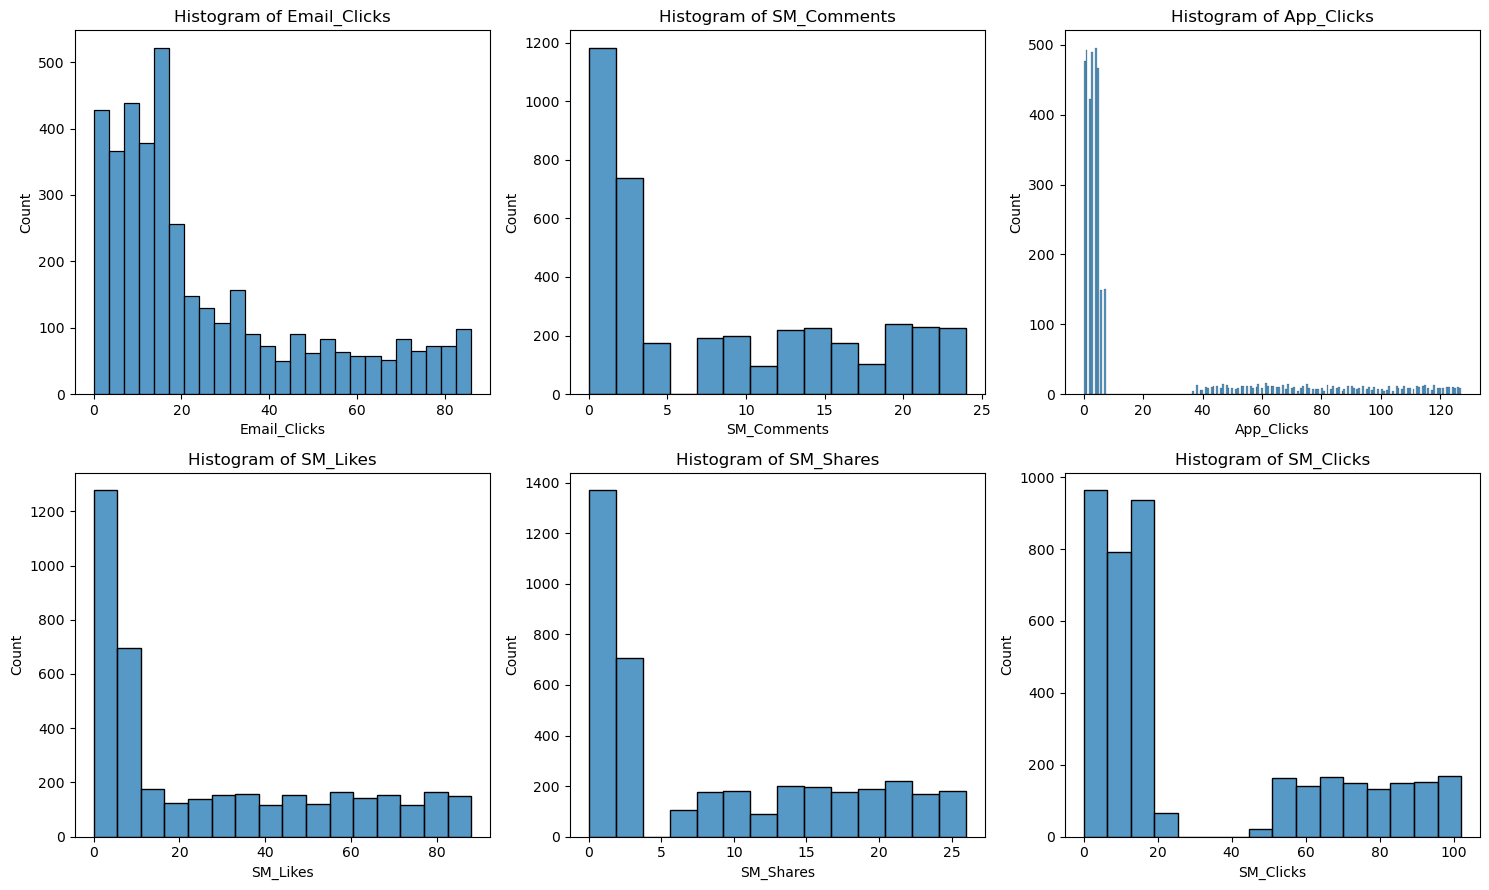

In [26]:
#look ate distribution of values
fig, axes = plt.subplots(2, 3, figsize=(15, 9))  # Create a 2x3 grid of subplots
axes = axes.flatten()  # Flatten the 2D array of axes to iterate over it

for i, column in enumerate(df_dig.columns):
        sns.histplot(df_dig[column], ax=axes[i])
        axes[i].set_title(f'Histogram of {column}')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

There is mostly an tendency for a group of people to interact very little (the majority) with social apps, and other groups wwll distributed with some to many interactions.  

The resemblance of SM_Comments with SM_Shares is striking. We should investigate this - and all correlations.

No outliers observed.

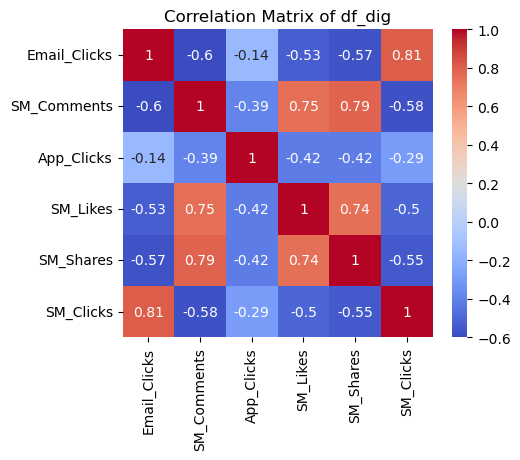

In [25]:
#correlatiomn between features
corr_matrix = df_dig.corr()
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(5, 4))  # Set the size of the figure
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')#, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix of df_dig')
plt.show()

There are some high correlations:
- **SM** interactions are highly correlated 0.74-0.79  
  - with a notable **exception**: moderare inverse correlation of **SM_clicks**  

    
- **Email_Clicks** is **inversely** correlated with **all** other features, except a high correlation with **SM_clicks**  

     
- **App_clicks** are generally moderately **inversely** correlated with **all** other features.   

The correlation between SM_Comments and SM_Shares is not high enough so that we can eliminate the SM_Shares feature.

In [27]:
#percentage of SM_Shares null values
df_dig['SM_Shares'].isnull().mean()

0.00975

Less than 1% of values of SM_Shares are missing. Given the apparent existence of at least two populations, neither the mean or the median would be suitable to fill missing values. Other features do not allow a good estimation of the missing values.  
Since the missing values represent such a low proportion of the populations let's eliminate them.

In [29]:
#drop entries with missing values
df_dig_clean = df_dig.dropna()
print(len(df_dig_clean))

3961


### Feature Reduction
one or two SM features?
(Variance Explained: Consider how much of the variance in your dataset is explained by these features. Sometimes, despite high correlation, both features might capture different aspects that are critical for clustering.)

### Feature Scaling

### Determine Optimal Number of Clusters
Elbow Method, Silhouette Score, or the Gap Statistic

### K-Means Clustering

### Evaluate Clusters
(Check for their coherence and separation to ensure that the clustering is meaningful.)

### Interpret Results:
(Interpret the characteristics of each cluster. Understand what each cluster represents in the context of client behavior.)

### Actionable Insights:
(Use the segmentation to derive actionable insights for business strategies such as targeted marketing, personalized customer engagement, etc.)